# Exploratory Data Analysis: Bank Customer Churn

**Objective:** Analyze the bank customer churn dataset to understand patterns, distributions, and relationships that will inform our prediction model.

**Dataset:** 10,000 bank customers with 14 features

**Target Variable:** `Exited` (1 = churned, 0 = retained)


## 1. Setup and Data Loading


In [6]:
# Install required packages if missing
import sys
import subprocess

def install_if_missing(pip_name, import_name=None):
    """Install package if it's not available."""
    if import_name is None:
        import_name = pip_name.replace("-", "_")
    try:
        __import__(import_name)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", "--quiet", pip_name])

# Install required packages
required_packages = [
    ("psutil", "psutil"),
    ("pandas", "pandas"),
    ("numpy", "numpy"),
    ("matplotlib", "matplotlib"),
    ("seaborn", "seaborn"),
    ("scipy", "scipy")
]

for pip_name, import_name in required_packages:
    install_if_missing(pip_name, import_name)


In [7]:
# Load data from local file
from pathlib import Path
import pandas as pd

current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == "notebooks" else current_dir
data_path = project_root / "data" / "churn.csv"

df = pd.read_csv(data_path)

In [8]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Initial Data Inspection


In [9]:
# Display first few rows
display(df.head())


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
# Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
# Statistical summary
display(df.describe())

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
# Check for missing values
missing = df.isnull().sum()
if missing.sum() > 0:
    display(missing[missing > 0])

In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Duplicate rows: {duplicates}")

### Remove High Cardinality Columns

Columns with too many unique values (high cardinality) are not useful for modeling and should be removed.


In [14]:
# Analyze column cardinality
cardinality = {}
for col in df.columns:
    cardinality[col] = {
        'unique_count': df[col].nunique(),
        'unique_ratio': df[col].nunique() / len(df),
        'dtype': df[col].dtype
    }

cardinality_df = pd.DataFrame(cardinality).T
display(cardinality_df)


,unique_count,unique_ratio,dtype
RowNumber,10000,1.0,int64
CustomerId,10000,1.0,int64
Surname,2932,0.2932,object
CreditScore,460,0.046,int64
Geography,3,0.0003,object
Gender,2,0.0002,object
Age,70,0.007,int64
Tenure,11,0.0011,int64
Balance,6382,0.6382,float64
NumOfProducts,4,0.0004,int64


In [15]:

# Remove uninformative columns
cols_to_remove = ['RowNumber', 'CustomerId', 'Surname']
existing_cols = [col for col in cols_to_remove if col in df.columns]

if existing_cols:
    df = df.drop(columns=existing_cols)

## 3. Target Variable Analysis (Churn Rate)


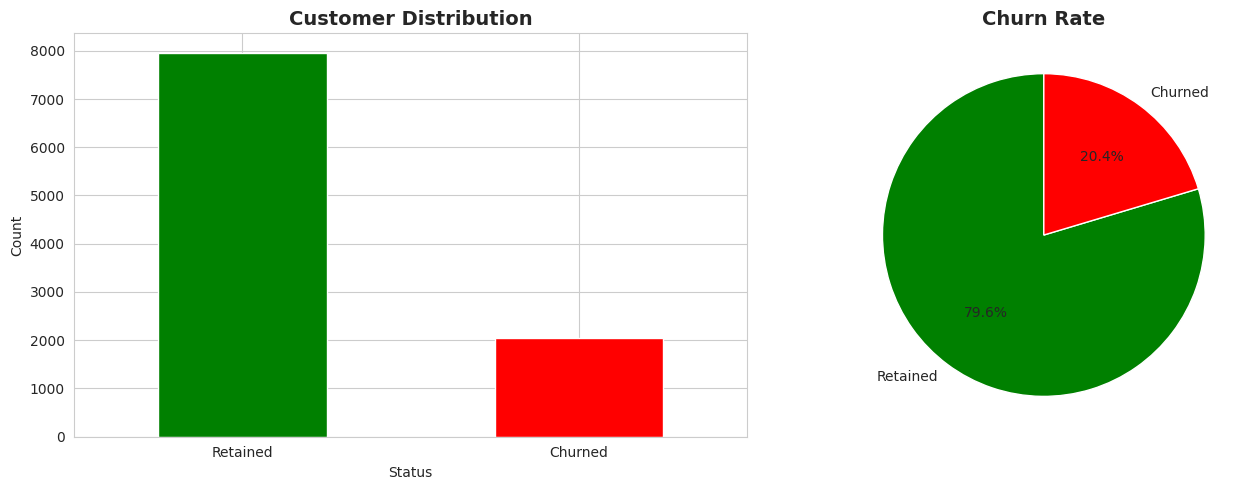

In [16]:
# Churn rate analysis
churn_counts = df['Exited'].value_counts()
churn_rate = df['Exited'].mean()

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

churn_counts.plot(kind='bar', ax=axes[0], color=['green', 'red'])
axes[0].set_title('Customer Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Retained', 'Churned'], rotation=0)

axes[1].pie(churn_counts, labels=['Retained', 'Churned'], autopct='%1.1f%%', 
            colors=['green', 'red'], startangle=90)
axes[1].set_title('Churn Rate', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()


The customer churn dataset is significantly unbalanced, with approximately 80% retained and 20% churned customers. This imbalance can cause models to become biased toward the majority class and underperform in detecting churn.

To address this, we apply **SMOTE oversampling during model training**, generating synthetic minority-class samples *only within the training set*. This ensures the model learns balanced decision boundaries without leaking synthetic data into the test set, ultimately improving its ability to detect churn.

In [17]:
# Split data for comparison
retained = df[df['Exited'] == 0]
churned = df[df['Exited'] == 1]
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']


### Detailed Distribution: Exited vs Non-Exited Customers

Compare characteristics of churned and retained customers across all features.


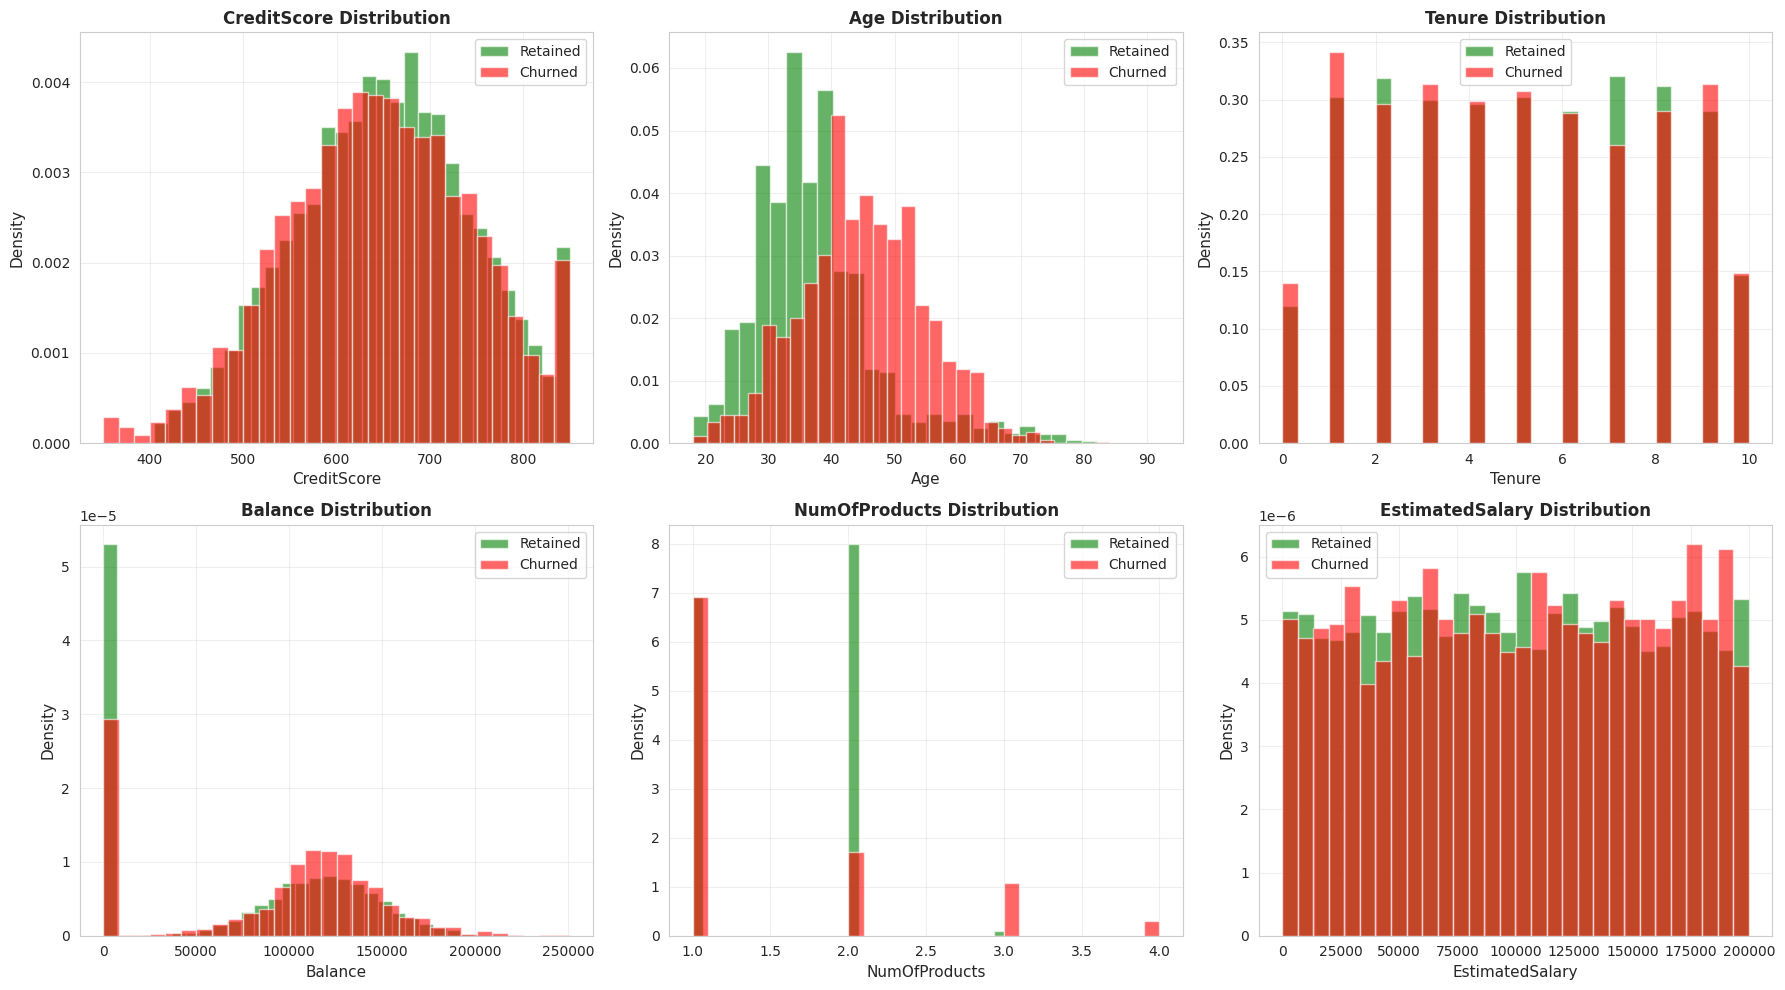

In [18]:
# Visualization 1: Distribution comparison for numerical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    
    # Histogram with KDE
    retained[feature].hist(bins=30, alpha=0.6, label='Retained', color='green', 
                           density=True, ax=ax)
    churned[feature].hist(bins=30, alpha=0.6, label='Churned', color='red', 
                          density=True, ax=ax)
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Density', fontsize=11)
    ax.set_title(f'{feature} Distribution', fontsize=12, fontweight='bold')
    ax.legend()
    ax.grid(alpha=0.3)

plt.tight_layout()
plt.show()


The charts above shows two features with clear separation between churned and retained customers:

1. **Age**

	 * Older customers (especially 40–55 years old) churn at significantly higher rates than younger customers.
	 * This makes age one of the strongest indicators of churn risk.

2. **Number of Products**

	 * Customers with **only one product** are far more likely to churn, indicating weak engagement.
	 * Customers with **two products** are the most loyal, while churn increases again for those with 3–4 products.

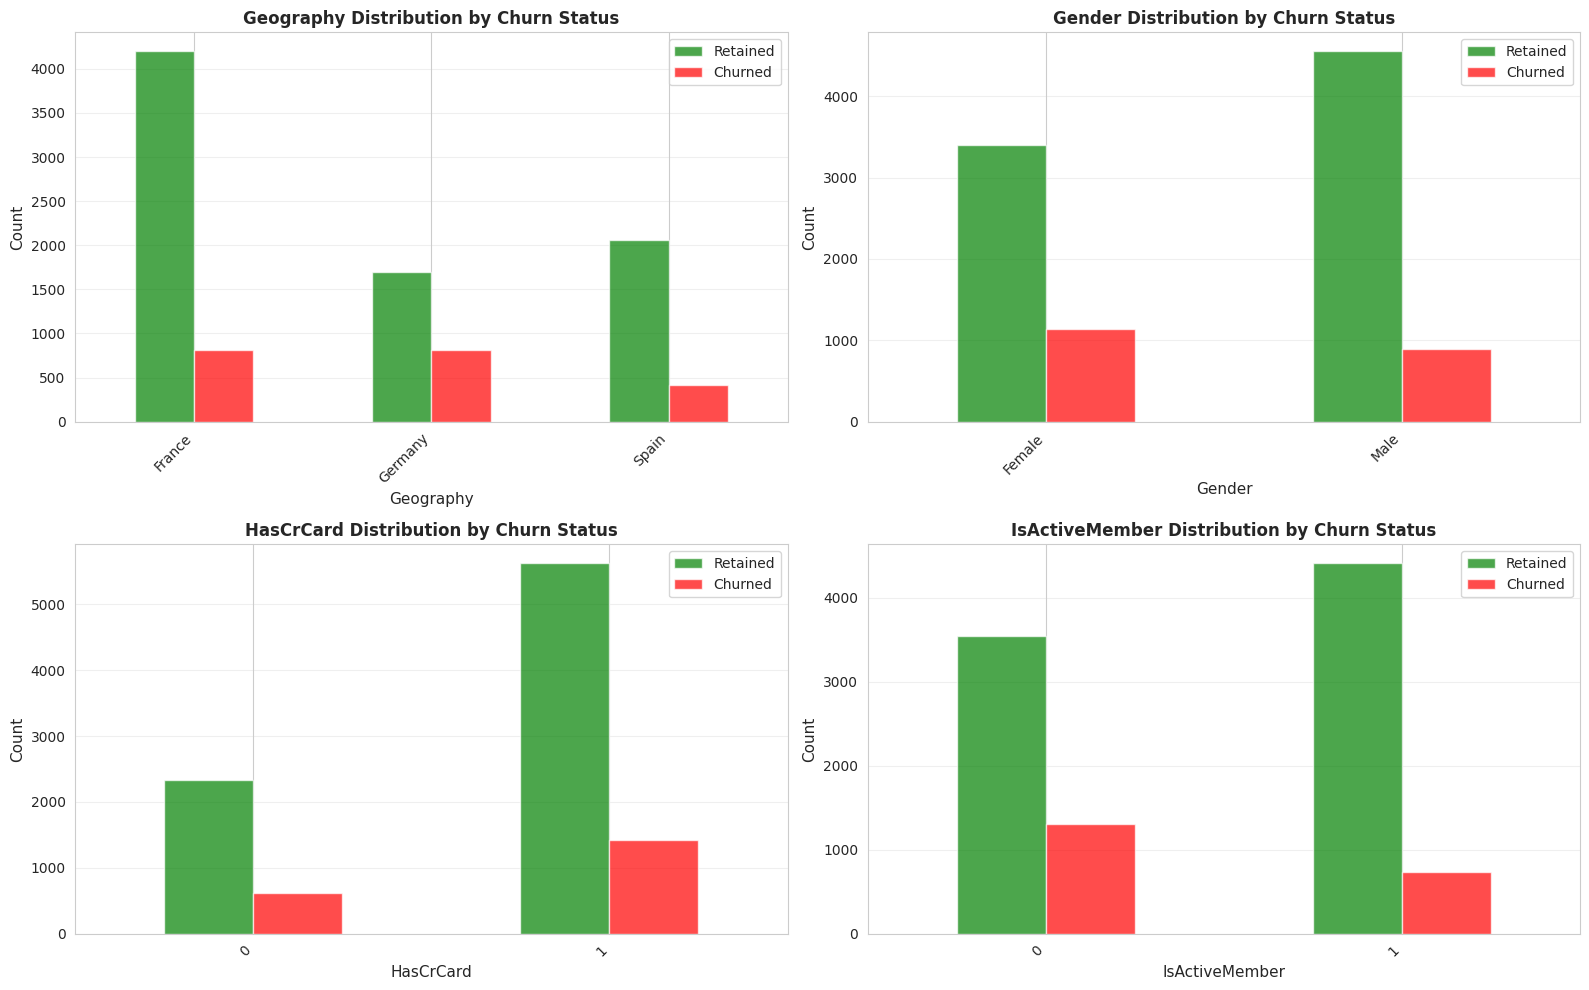

In [19]:
# Visualization 2: Categorical features comparison
categorical_features = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for idx, feature in enumerate(categorical_features):
    ax = axes[idx]
    
    # Create comparison data
    feature_churn = df.groupby([feature, 'Exited']).size().unstack(fill_value=0)
    
    # Stacked bar chart
    feature_churn.plot(kind='bar', stacked=False, ax=ax, 
                       color=['green', 'red'], alpha=0.7)
    
    ax.set_xlabel(feature, fontsize=11)
    ax.set_ylabel('Count', fontsize=11)
    ax.set_title(f'{feature} Distribution by Churn Status', fontsize=12, fontweight='bold')
    ax.legend(['Retained', 'Churned'], loc='upper right')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


The charts above shows:

* **Geography** matters: customers from **Germany show a noticeably higher churn rate** than those from France or Spain.
* **IsActiveMember** is a strong driver: **inactive customers are far more likely to churn**.

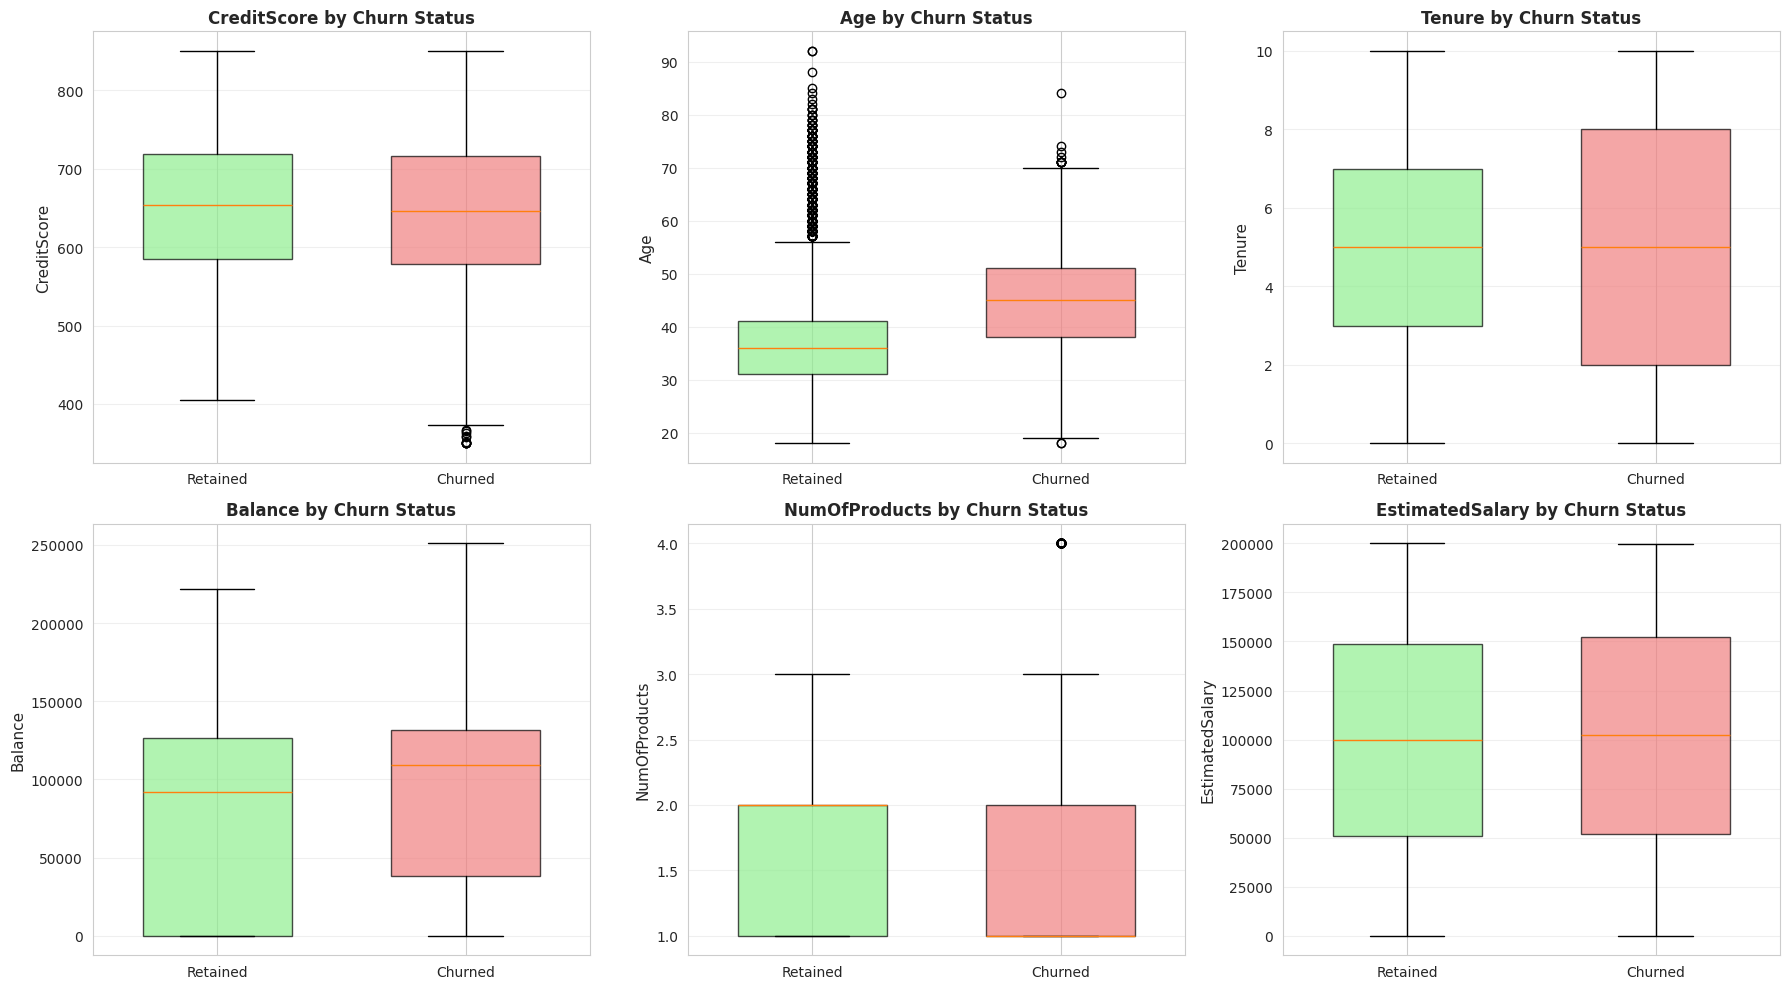

In [20]:
# Visualization 3: Box plots for numerical features (Exited vs Non-Exited)
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, feature in enumerate(numerical_features):
    ax = axes[idx]
    
    # Box plot
    data_to_plot = [retained[feature].dropna(), churned[feature].dropna()]
    bp = ax.boxplot(data_to_plot, tick_labels=['Retained', 'Churned'], 
                    patch_artist=True, widths=0.6)
    
    # Color the boxes
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    ax.set_ylabel(feature, fontsize=11)
    ax.set_title(f'{feature} by Churn Status', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

Here:

* **Age** shows the strongest separation: churned customers are clearly older on average, with a noticeably higher median and many high-age outliers.
* **NumOfProducts** shows churn concentrated among customers with **1 product**, while retained customers typically have 1–2.
* **Balance** is higher for churned customers, with a slightly higher median and more high-balance cases—indicating higher-value customers may be more likely to leave.
* **CreditScore, Tenure, and EstimatedSalary** show overlapping distributions with only minor differences, indicating weak predictive power individually.

## 4. Feature Analysis


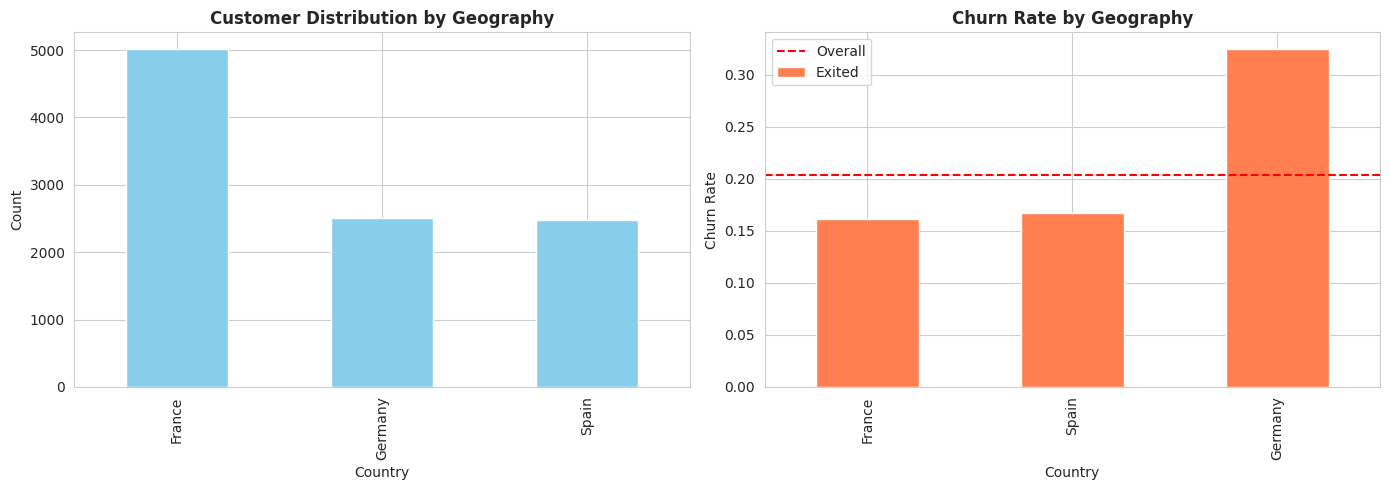

Geography
France     0.161548
Spain      0.166734
Germany    0.324432
Name: Exited, dtype: float64

In [21]:
# Geography analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['Geography'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Customer Distribution by Geography', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Count')

geo_churn = df.groupby('Geography')['Exited'].mean().sort_values()
geo_churn.plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Churn Rate by Geography', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Churn Rate')
axes[1].axhline(y=churn_rate, color='red', linestyle='--', label='Overall')
axes[1].legend()

plt.tight_layout()
plt.show()

display(geo_churn)


* Despite its smaller customer count, **Germany has by far the highest churn rate (~32%)**, well above the overall churn rate (~20%).
* France and Spain have **much lower churn rates (≈16–17%)**, both significantly below the global average.

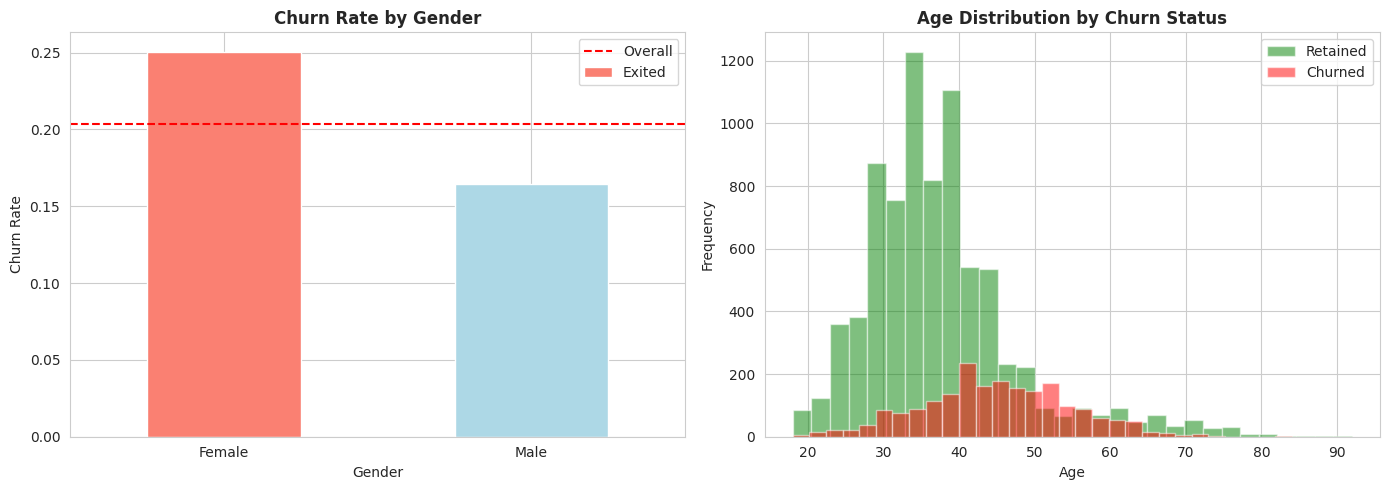

In [22]:
# Age and Gender analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

gender_churn = df.groupby('Gender')['Exited'].mean()
gender_churn.plot(kind='bar', ax=axes[0], color=['salmon', 'lightblue'])
axes[0].set_title('Churn Rate by Gender', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Churn Rate')
axes[0].axhline(y=churn_rate, color='red', linestyle='--', label='Overall')
axes[0].legend()
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

retained['Age'].hist(bins=30, alpha=0.5, label='Retained', color='green', ax=axes[1])
churned['Age'].hist(bins=30, alpha=0.5, label='Churned', color='red', ax=axes[1])
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Age Distribution by Churn Status', fontweight='bold')
axes[1].legend()

plt.tight_layout()
plt.show()


* **Gender:** Female customers have a **significantly higher churn rate (~25%)** than males (~16%), placing them well above the overall churn average (~20%).
* **Age:** Churned customers are generally **older**, with churn becoming more common **from age 40+, and peaking around 45–55**.

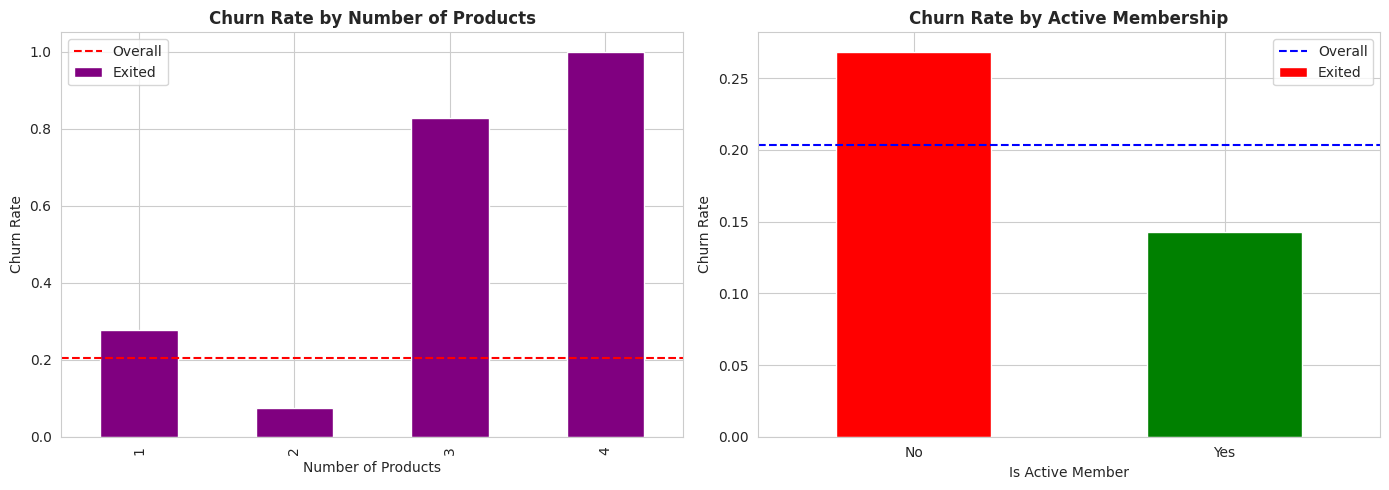

In [23]:
# Number of Products and Active Member analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

product_churn = df.groupby('NumOfProducts')['Exited'].mean()
product_churn.plot(kind='bar', ax=axes[0], color='purple')
axes[0].set_title('Churn Rate by Number of Products', fontweight='bold')
axes[0].set_xlabel('Number of Products')
axes[0].set_ylabel('Churn Rate')
axes[0].axhline(y=churn_rate, color='red', linestyle='--', label='Overall')
axes[0].legend()

active_churn = df.groupby('IsActiveMember')['Exited'].mean()
active_churn.plot(kind='bar', ax=axes[1], color=['red', 'green'])
axes[1].set_title('Churn Rate by Active Membership', fontweight='bold')
axes[1].set_xlabel('Is Active Member')
axes[1].set_ylabel('Churn Rate')
axes[1].set_xticklabels(['No', 'Yes'], rotation=0)
axes[1].axhline(y=churn_rate, color='blue', linestyle='--', label='Overall')
axes[1].legend()

plt.tight_layout()
plt.show()


* **Number of Products:** indicates a **U-shaped risk pattern**, where low engagement (1 product) and potentially overwhelmed or dissatisfied high-engagement customers (3–4 products) are at highest risk.
- **Customer activity is one of the strongest predictors of churn**, with inactive members being significantly more likely to leave.

## 5. Correlation Analysis


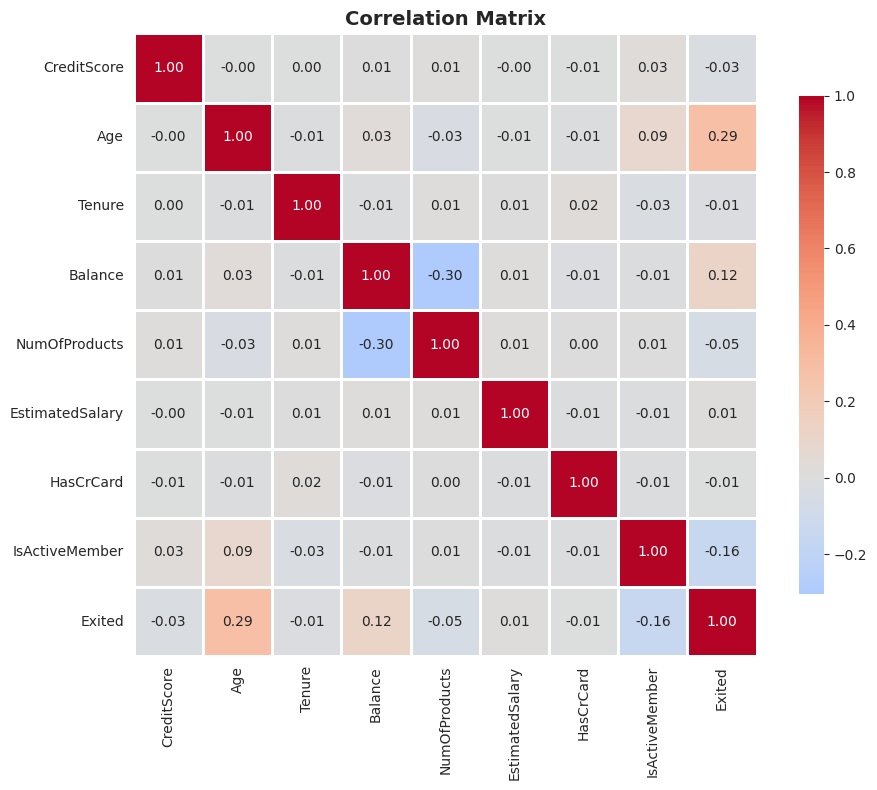

Exited             1.000000
Age                0.285323
Balance            0.118533
EstimatedSalary    0.012097
HasCrCard         -0.007138
Tenure            -0.014001
CreditScore       -0.027094
NumOfProducts     -0.047820
IsActiveMember    -0.156128
Name: Exited, dtype: float64

In [24]:
# Correlation matrix
correlation_features = numerical_features + ['HasCrCard', 'IsActiveMember', 'Exited']
corr_matrix = df[correlation_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

target_corr = corr_matrix['Exited'].sort_values(ascending=False)
display(target_corr)


* **Age** has the strongest positive correlation with churn (**0.29**), confirming that **older customers are more likely to leave**.
* **Balance** shows a mild positive correlation with churn (**0.12**), aligning with earlier observations that **higher-balance customers churn more**.
* **IsActiveMember** has a negative correlation with churn (**–0.16**), indicating that **active customers are less likely to churn**.


## 7. Next Steps

1. **Data Preparation:**
	 - Remove RowNumber, CustomerId, Surname
	 - Encode categorical variables (Geography, Gender)
	 - Scale numerical features
	 - Handle class imbalance with SMOTE or class weights

2. **Model Selection:**
	 - Start with Logistic Regression (baseline)
	 - Try tree-based models (Random Forest, XGBoost)
	 - Ensemble methods

3. **Evaluation:**
	 - Use stratified cross-validation
	 - Focus on recall for churned customers
	 - Use F1-score for overall performance

